In [10]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 448 kB 62.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [1]:
import pandas as pd

In [2]:
train_data=pd.read_csv("/content/여행지 테마별 분류_최종본(21.09.06).csv")

In [3]:
train_data.head()

,청정 우도에서 만난 청정 노을의 맑은 색,우도(해양도립공원),자연
0,보리밭을 지나다 아름다운 풍경에 홀릭 . 마침 남편의 생일을 맞아 멋진 사진을 남겨...,우도(해양도립공원),자연
1,보리밭을 지나다 아름다운 풍경에 홀릭 . 마침 남편의 생일을 맞아 멋진 사진을 남겨...,우도(해양도립공원),자연
2,우도섬에 봄이 왔습니다. 유채와 청보리 파란 하늘과 그보다 더 푸른섬 우도가 제주의...,우도(해양도립공원),자연
3,일몰이 제일 아름답다는 우도 낮에 사람들로 가득한 우도는 마지막 배가 떠나고 나면 ...,우도(해양도립공원),자연
4,세번째 제주여행 우도는 처음이였는데 너무 좋았어요,우도(해양도립공원),자연


In [4]:
train_data.columns=['text','name','label']

In [5]:
train_data['text'] = train_data['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]

,text,name,label
0,보리밭을 지나다 아름다운 풍경에 홀릭 마침 남편의 생일을 맞아 멋진 사진을 남겨 ...,우도(해양도립공원),자연
1,보리밭을 지나다 아름다운 풍경에 홀릭 마침 남편의 생일을 맞아 멋진 사진을 남겨 ...,우도(해양도립공원),자연
2,우도섬에 봄이 왔습니다 유채와 청보리 파란 하늘과 그보다 더 푸른섬 우도가 제주의 ...,우도(해양도립공원),자연
3,일몰이 제일 아름답다는 우도 낮에 사람들로 가득한 우도는 마지막 배가 떠나고 나면 ...,우도(해양도립공원),자연
4,세번째 제주여행 우도는 처음이였는데 너무 좋았어요,우도(해양도립공원),자연


In [6]:
print(train_data.isnull().sum())

text     0
name     0
label    0
dtype: int64


In [7]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [12]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [13]:
X_train = []
for sentence in train_data['text']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [15]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10228
등장 빈도가 2번 이하인 희귀 단어의 수: 5808
단어 집합에서 희귀 단어의 비율: 56.78529526789207
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.3621597232666565


In [16]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4421


In [17]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

In [18]:
print(X_train[:3])

[[2364, 1, 717, 18, 72, 2864, 1541, 770, 1349, 1, 365, 69, 23, 1, 1063, 201, 223, 21, 1, 3201, 23, 60, 749, 3202, 63, 102, 5, 18, 1918, 1702, 8, 2198, 18, 1622, 251, 62], [2364, 1, 717, 18, 72, 2864, 1541, 770, 1349, 1, 365, 69, 23, 1, 1063, 201, 223, 21, 1, 3201, 23, 60, 749, 3202, 63, 102, 5, 18, 1918, 1702, 8, 2198, 18, 1622, 251, 62], [48, 155, 245, 30, 1919, 718, 1064, 181, 31, 9, 37, 377, 155, 48, 6, 26, 8, 1259, 2, 48, 8, 245, 1, 750]]


In [20]:
train_data['label']

0       자연
1       자연
2       자연
3       자연
4       자연
        ..
6067    교육
6068    교육
6069    교육
6070    교육
6071    교육
Name: label, Length: 6072, dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(train_data['label'])
train_data['label']=y

In [23]:
y_train = np.array(train_data['label'])

In [24]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [25]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

6072
6072


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


리뷰의 최대 길이 : 302
리뷰의 평균 길이 : 26.18148880105402


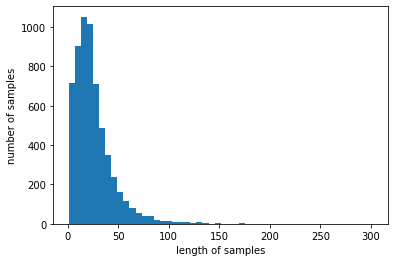

In [26]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [27]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [28]:
max_len = 100
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 100 이하인 샘플의 비율: 98.78129117259552


In [29]:
X_train = pad_sequences(X_train, maxlen = max_len)

In [30]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

In [32]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [34]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
81/81 [==============================] - 25s 259ms/step - loss: 0.7373 - acc: 0.6866 - val_loss: 1.2837 - val_acc: 0.2790

Epoch 00001: val_acc improved from -inf to 0.27901, saving model to best_model.h5
Epoch 2/15
81/81 [==============================] - 19s 230ms/step - loss: 0.2732 - acc: 0.9047 - val_loss: 1.7041 - val_acc: 0.3926

Epoch 00002: val_acc improved from 0.27901 to 0.39259, saving model to best_model.h5
Epoch 3/15
81/81 [==============================] - 19s 237ms/step - loss: 0.1750 - acc: 0.9456 - val_loss: 1.7455 - val_acc: 0.4584

Epoch 00003: val_acc improved from 0.39259 to 0.45844, saving model to best_model.h5
Epoch 4/15
81/81 [==============================] - 19s 239ms/step - loss: 0.1181 - acc: 0.9658 - val_loss: 1.2625 - val_acc: 0.6296

Epoch 00004: val_acc improved from 0.45844 to 0.62963, saving model to best_model.h5
Epoch 5/15
81/81 [==============================] - 19s 233ms/step - loss: 0.0735 - acc: 0.9780 - val_loss: 1.3469 - val_acc: 0

In [62]:
test_data=pd.read_csv("/content/여행지_45개_테스트 데이터_test_1.csv",encoding='cp949')

In [63]:
test_data.head()

,성산 일출봉,자연,"푸른 바다 사이에 우뚝 솟은 성채와 같은 모양, 봉우리 정상에 있는 거대한 사발 모양의 분화구, 그리고 그 위에서 맞이하는 일출의 장관 때문에 성산일출봉은 많은 사람들의 감흥과 탄성을 자아낸다. 성산일출봉과 어우러진 경치는 아름답고 장관이다."
0,사려니숲길,자연,"사려니숲길은 제주의 숨은 비경 31곳 중 하나로, 비자림로를 시작으로 물찻오름과 사..."
1,협재 해수욕장,자연,투명한 물에 에메랄드빛 물감을 서서히 풀어놓은 듯한 바다빛은 보는 것만으로도 힐링이...
2,월정리 해변,자연,"아름다운 에메랄드빛 바다가 한 폭의 그림처럼 펼쳐져 있고, 그 위에는 밝은 달이 비..."
3,함덕 해수욕장,자연,"입구부터 환영해주는 키 큰 야자수들, 하얀 모래와 대조를 이루는 에메랄드빛 바다, ..."
4,산굼부리,자연,천연기념물 분화구이다. 이곳은 다양한 희귀식물들이 한 공간에 존재하는 '분화구 식물...


In [64]:
test_data.columns=['name','label','text']

In [65]:
test_data.head()

,name,label,text
0,사려니숲길,자연,"사려니숲길은 제주의 숨은 비경 31곳 중 하나로, 비자림로를 시작으로 물찻오름과 사..."
1,협재 해수욕장,자연,투명한 물에 에메랄드빛 물감을 서서히 풀어놓은 듯한 바다빛은 보는 것만으로도 힐링이...
2,월정리 해변,자연,"아름다운 에메랄드빛 바다가 한 폭의 그림처럼 펼쳐져 있고, 그 위에는 밝은 달이 비..."
3,함덕 해수욕장,자연,"입구부터 환영해주는 키 큰 야자수들, 하얀 모래와 대조를 이루는 에메랄드빛 바다, ..."
4,산굼부리,자연,천연기념물 분화구이다. 이곳은 다양한 희귀식물들이 한 공간에 존재하는 '분화구 식물...


NameError: ignored

In [66]:
test_data['text'] = test_data['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [67]:
test_data['text'] = test_data['text'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
test_data['text'].replace('', np.nan, inplace=True)
print(test_data.isnull().sum())

name     0
label    0
text     0
dtype: int64


In [68]:
X_test = []
for sentence in test_data['text']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [69]:
X_test = tokenizer.texts_to_sequences(X_test)

In [70]:
y_test = np.array(test_data['label'])

In [71]:
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

In [72]:
X_test = pad_sequences(X_test, maxlen = max_len)

In [73]:
loaded_model = load_model('best_model.h5')

In [74]:
y_1=encoder.transform(y_test)
y_test=y_1

In [75]:
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2])

In [76]:
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

2/2 [==============================] - 0s 35ms/step - loss: 0.3805 - acc: 0.8889

 테스트 정확도: 0.8889


In [77]:
loaded_model.predict(X_test)

array([[6.5623310e-05, 1.3961374e-04, 9.9979478e-01],
       [5.2310086e-05, 1.3957925e-04, 9.9980813e-01],
       [2.8021293e-04, 4.8295216e-04, 9.9923682e-01],
       [3.6178043e-03, 4.6407033e-02, 9.4997513e-01],
       [1.6205700e-05, 3.9102189e-05, 9.9994469e-01],
       [1.0840968e-04, 1.9041503e-04, 9.9970120e-01],
       [3.5190939e-03, 1.4737115e-02, 9.8174381e-01],
       [2.6722186e-05, 1.2731772e-04, 9.9984598e-01],
       [3.1038169e-05, 6.9887057e-05, 9.9989903e-01],
       [2.8011918e-06, 3.3362512e-06, 9.9999392e-01],
       [1.2850665e-04, 1.8913337e-04, 9.9968243e-01],
       [2.7916292e-05, 4.3215754e-05, 9.9992883e-01],
       [1.0844014e-06, 1.3846155e-06, 9.9999750e-01],
       [5.3421750e-06, 7.4584977e-06, 9.9998724e-01],
       [9.9991703e-01, 3.9737966e-05, 4.3225711e-05],
       [9.9988806e-01, 4.5410310e-05, 6.6487264e-05],
       [1.5029377e-01, 8.4674621e-01, 2.9600984e-03],
       [9.9988592e-01, 3.6045702e-05, 7.8020450e-05],
       [9.8953044e-01, 2.711